In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
car_data=pd.read_csv('/content/car_prediction_data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
#getting some information
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#checking the missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking the distrubition of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#encoding the categorical data
#encoding seller_type column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1 ,'CNG':2}},inplace=True)
#encoding fuel_type column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1 }},inplace=True)
#encoding transission column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1 }},inplace=True)



In [11]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#slitting data into feayures and target
x=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [16]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [17]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [18]:
#splitting training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

model trainin

In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
#model evaluation
training_car_data_prediction=model.predict(x_train)


In [23]:
# R squared Error
error_score = metrics.r2_score(y_train, training_car_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


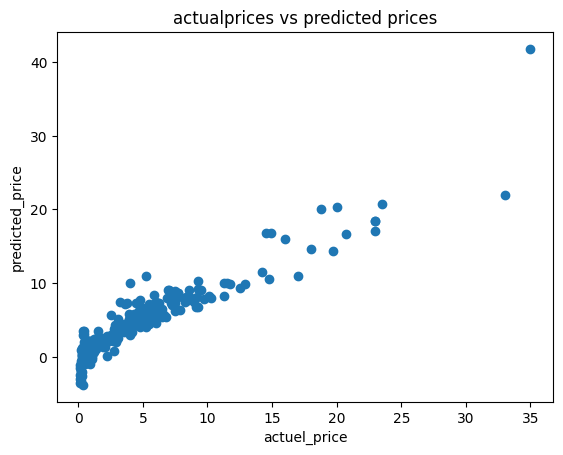

In [24]:
#visualize the actuel data
plt.scatter(y_train,training_car_data_prediction)
plt.xlabel('actuel_price')
plt.ylabel('predicted_price')
plt.title('actualprices vs predicted prices')
plt.show()

In [25]:
test_data_prediction=model.predict(x_test)

In [26]:
#error score
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8365766715027051


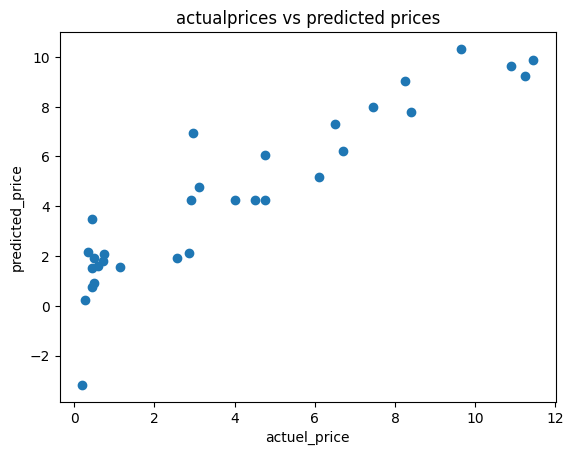

In [27]:
#visualize the actuel data
plt.scatter(y_test,test_data_prediction)
plt.xlabel('actuel_price')
plt.ylabel('predicted_price')
plt.title('actualprices vs predicted prices')
plt.show()

In [ ]:
#lasso regression


In [28]:
model1=Lasso()

In [29]:
model1.fit(x_train,y_train)

Lasso()

In [30]:
training_dataset=model.predict(x_train)

In [31]:
error_score = metrics.r2_score(y_train, training_dataset)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


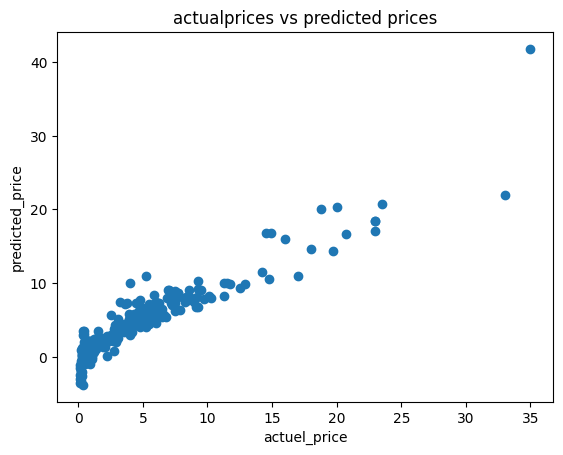

In [32]:
#visualize the actuel data
plt.scatter(y_train,training_dataset)
plt.xlabel('actuel_price')
plt.ylabel('predicted_price')
plt.title('actualprices vs predicted prices')
plt.show()

In [33]:
test_dataset=model1.predict(x_test)

In [34]:
error_score = metrics.r2_score(y_test,test_dataset )
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


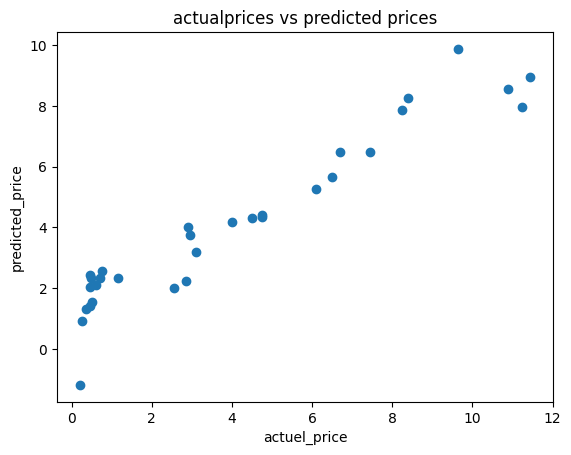

In [35]:
#visualize the actuel data
plt.scatter(y_test,test_dataset)
plt.xlabel('actuel_price')
plt.ylabel('predicted_price')
plt.title('actualprices vs predicted prices')
plt.show()